# Scaler - Clustering

**Problem Statement**

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

**Data Dictionary**

- Unnamed 0’- Index of the dataset
- Email_hash- Anonymised Personal Identifiable Information (PII)
- Company_hash- Current employer of the learner
- orgyear- Employment start date
- CTC- Current CTC
- Job_position- Job profile in the company
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

## Import Libraries and loading data

In [ ]:
# Basic Libraries for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress any warnings coming out
import warnings                       
warnings.filterwarnings("ignore")

# For tracking the progress
from tqdm.notebook import tqdm_notebook

# For Target encoding
!pip install category_encoders
from category_encoders import TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.6 MB/s eta 0:00:00


In [ ]:
# Read the dataset 
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv')

In [ ]:
# top 5 rows
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
# bottom 5 rows
df.tail()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0
205842,206922,bgqsvz onvzrtj,0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f...,2014.0,1240000,NaN,2016.0


## Exploratory Data Analysis 

In [ ]:
# Shape of dataset
df.shape

(205843, 7)

- Data contains 205K records with 7 columns
- Unnamed:0 column can be dropped as it is index of dataset

In [ ]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


From above, we can say that 

  - There are NULL values in all columns execept email_hash and ctc
  - Year columns: org_year and ctc_updated_year are of float type
  - ctc is numeric


In [ ]:
# columns 
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [ ]:
# Percentage of NULLs in each column (where % > 0)

for i in df.columns:
    if (df[i].isna().sum() * 100 / len(df)) > 0 : 
        print(f'Percentage of NULL values in {i} :{np.round(df[i].isna().sum() * 100 / len(df),2)}')

Percentage of NULL values in company_hash :0.02
Percentage of NULL values in orgyear :0.04
Percentage of NULL values in job_position :25.53


In [ ]:
# Unique values in each column
df.nunique()

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [ ]:
'''
For categorical variables - unique count 
For continuous variables - 3 point summary: min, max, mean
'''

for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Number of unique values in {i}: {df[i].nunique()}')
print('\n')
for i in df.columns:
    if df[i].dtype != 'object':
        print(f'For column {i} - ')
        print(f'min value: {df[i].min()}, max value: {df[i].max()}, Average value: {np.round(df[i].mean(),3)}')
        print('\n')

Number of unique values in company_hash: 37299
Number of unique values in email_hash: 153443
Number of unique values in job_position: 1017


For column orgyear - 
min value: 0.0, max value: 20165.0, Average value: 2014.883


For column ctc - 
min value: 2, max value: 1000150000, Average value: 2271685.042


For column ctc_updated_year - 
min value: 2015.0, max value: 2021.0, Average value: 2019.628




In [ ]:
# Statistical Summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


From above:
    
  - ORGYEAR: Max value of ORGYEAR is 20165, which is not possible, hence we need to explore this column and remove any such erroneous values.
    
  - CTC: Mean CTC is 2271685, whereas Median is 950000, which hints CTC is following a skewed (left-skewed) distribution

In [ ]:
df[df['orgyear'] == 20165]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
183768,ftxzcton,4007e5caadc3f52c3e18bf2b4eacbadf17b114208c2d04...,20165.0,1560000,NaN,2019.0
203992,xatv ouvqp ogrhnxgzo ucn rna,7191da2e57dcb0c1301711e889ea72d5cc801e039359b1...,20165.0,850000,NaN,2019.0


- There are 2 records which correspond to org year 20165, which needs to be removed 

In [ ]:
df = df[df['orgyear'] != 20165]

In [ ]:
df['orgyear'].describe().T

count    205755.000000
mean       2014.706325
std          28.968136
min           0.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2204.000000
Name: orgyear, dtype: float64

Max value of year is 2204, which is not possible as current year is 2022. So need to fiter out the records where orgyear > 2022

In [ ]:
# Dropping records which are after 2022
df = df[df['orgyear'] <= 2022]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205419.0,2.014690e+03,2.898452e+01,0.0,2013.0,2016.0,2018.0,2.022000e+03
ctc,205419.0,2.256716e+06,1.172019e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205419.0,2.019627e+03,1.325442e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [ ]:
df.orgyear.value_counts()

2018.0    25256
2019.0    23427
2017.0    23239
2016.0    23043
2015.0    20610
          ...  
1981.0        1
1972.0        1
206.0         1
209.0         1
200.0         1
Name: orgyear, Length: 64, dtype: int64

- There are records in which year is less than 1000, which is not possible. Hence, lets filter out those records where orgyear < 1965

In [ ]:
df = df[df['orgyear'] > 1965]

In [ ]:
df.shape

(205375, 6)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205375.0,2.015105e+03,4.225918e+00,1970.0,2013.0,2016.0,2018.0,2.022000e+03
ctc,205375.0,2.256871e+06,1.172143e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205375.0,2.019627e+03,1.325507e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


- Statistical Summary looks reasonable. Hence, moving forward for further analysis

### Feature Engineering

In [ ]:
np.round(df.isna().sum()*100 /len(df),2)

company_hash         0.02
email_hash           0.00
orgyear              0.00
ctc                  0.00
job_position        25.53
ctc_updated_year     0.00
dtype: float64

- There are 2 columns in which NULL values are present: 
    1. company_hash
    2. job_position
    
- There are no NULL values in email_hash, which we can use to impute company_hash. Because, email_hash will be same for all employees if they are from same company. 
- Create a list of email_hash, where company_hash is NULL.Then, we check in the whole dataframe for those email_hash and impute the NULL company_hash wherever possible

In [ ]:
len(df[df['company_hash'].isna()]['email_hash'])

44

In [ ]:
null_company_hash = df[df['company_hash'].isna()]

for i in range(null_company_hash.shape[0]):
    _index = null_company_hash.index[i]
    not_null_company_hash = df[df['email_hash'] == null_company_hash['email_hash'].iloc[i]]['company_hash'].values.tolist()
    not_null_company_hash = [x for x in not_null_company_hash if str(x) != 'nan']
    
    if len(not_null_company_hash):
        df['company_hash'].loc[_index] = str(not_null_company_hash[0])

In [ ]:
len(df[df['company_hash'].isna()]['email_hash'])

37

- Number of NULLS in company_hash reduced from 44 to 37 and cannot be imputed more. So, dropping the NULL company_hash records

In [ ]:
df = df[~df['company_hash'].isna()]

In [ ]:
df.isna().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52400
ctc_updated_year        0
dtype: int64

- Like above technique we can use the same method to fill null values in column job_position . The aim is to find other entries in the database where job_position is not null and use those values to fill rows where job_position is null.

In [ ]:
len(df[df['job_position'].isna()]['email_hash'])

52400

In [ ]:
null_job_position = df[df['job_position'].isna()]

for row in tqdm_notebook(range(null_job_position.shape[0])):
    _index = null_job_position.index[row]
    not_null_job_position = df[df['email_hash'] == null_job_position['email_hash'].iloc[row]]['job_position'].values.tolist()
    not_null_job_position = [x for x in not_null_job_position if str(x) != 'nan']
    
    if len(not_null_job_position):
        df['job_position'].loc[_index] = str(not_null_job_position[-1])
        

  0%|          | 0/52400 [00:00<?, ?it/s]

In [ ]:
len(df[df['job_position'].isna()]['email_hash'])

21051

In [ ]:
df.head(1)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0


- Number of NULL values in job_position reduced from 52.4K to 21.05K, which is like more than 50% drop. But, for rest of NULL records, we cannot go with this approach.

- To impute the rest of 21K null values, we will perform KNN Imputation, but KNN Imputation needs numerical columns. So, we need to convert the company_hash and email_hash to numerical types. 


- For conversion, we can use One-hot encoding or label-encoding, which might not be a good option, because, with one-hot encoding, it will create so many features as nunique() is huge in these columns, and, label encoding can give wrong values. So, we will use Target Encoding with the hep of CTC

In [ ]:
df['job_position'] = df['job_position'].str.replace('^\d+$','')

In [ ]:
len(df[df['job_position'].isna()]['email_hash'])

21051

In [ ]:
encoder  = TargetEncoder()

print(f'Number of categories/unique values in company_hash: {df.company_hash.nunique()}')
df['num_company_hash'] = encoder.fit_transform(df['company_hash'],df['ctc'])

print(f'Number of categories/unique values in email_hash: {df.email_hash.nunique()}')
df['num_email_hash'] = encoder.fit_transform(df['email_hash'],df['ctc'])

Number of categories/unique values in company_hash: 37205
Number of categories/unique values in email_hash: 153013


In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1.971557e+06,2.092414e+06
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,2.197334e+06,2.000211e+06
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,2.223091e+06,2.188163e+06
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1.717560e+06,2.053950e+06
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1.996042e+06,2.134969e+06


- Since job_position is also a categorical variable and KNN requires Numerical values, we need to target encode them leaving the NULL values

In [ ]:
# Create a new column
df['new_job_position'] = df['job_position']

# store non-null values in array
non_nulls = np.array(df['new_job_position'].dropna())

impute_reshape = non_nulls.reshape(-1,1)

encoder = TargetEncoder()
impute_reshape = encoder.fit_transform(impute_reshape,df[~df['new_job_position'].isna()]['ctc'])

df['new_job_position'].loc[df['new_job_position'].notnull()] = np.squeeze(impute_reshape)

In [ ]:
# KNN Imputation

from sklearn.impute import KNNImputer 

KNN = KNNImputer(n_neighbors = 3)
columns = ['orgyear','ctc','ctc_updated_year','num_company_hash','num_email_hash','new_job_position']

df['new_job_position'] = pd.DataFrame(KNN.fit_transform(df.loc[:, columns]),
                                        columns = columns).loc[:, 'new_job_position']

In [ ]:
# Add new feature - Years of Experience: currentyear - orgyear

df['YOE'] = 2022 - df['orgyear']
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1.971557e+06,2.092414e+06,3.469013e+06,6.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,2.197334e+06,2.000211e+06,1.734762e+06,4.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,2.223091e+06,2.188163e+06,1.879331e+06,7.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1.717560e+06,2.053950e+06,1.879331e+06,5.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1.996042e+06,2.134969e+06,1.734762e+06,5.0


In [ ]:
# Percentage of NULLs after KNN imputation

np.round(df.isna().sum() * 100 / len(df),2)

company_hash         0.00
email_hash           0.00
orgyear              0.00
ctc                  0.00
job_position        10.25
ctc_updated_year     0.00
num_company_hash     0.00
num_email_hash       0.00
new_job_position     0.24
YOE                  0.00
dtype: float64

In [ ]:
# Dropping the rest 0.24% records where new_job_position is NULL 

df = df[~df['new_job_position'].isna()]
df.shape

(204835, 10)

In [ ]:
# Drop duplicate records

df.drop_duplicates(['company_hash','email_hash','orgyear','ctc','ctc_updated_year','job_position'],inplace = True)

In [ ]:
df.shape

(178524, 10)

- After all Feature Engineering, we are left with 178.5K records

## Univariate Analysis

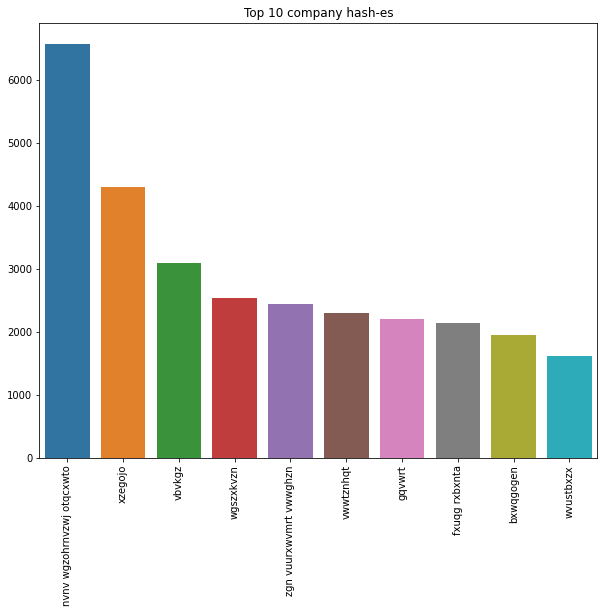

In [ ]:
fig = plt.figure(figsize = (10,8))

sns.barplot(x = df['company_hash'].value_counts().head(10).index,
            y = df['company_hash'].value_counts().head(10).values.tolist())

plt.xticks(rotation = 90)
plt.title('Top 10 company hash-es')
plt.show()

In [ ]:
df['company_hash'].value_counts().head(10)

nvnv wgzohrnvzwj otqcxwto    6574
xzegojo                      4296
vbvkgz                       3099
wgszxkvzn                    2548
zgn vuurxwvmrt vwwghzn       2441
vwwtznhqt                    2297
gqvwrt                       2206
fxuqg rxbxnta                2142
bxwqgogen                    1956
wvustbxzx                    1626
Name: company_hash, dtype: int64

**Insight:**
    
- Highest number of entries(or people) are from "nvnv wgzohrnvzwj otqcxwto" with over 6500+ entries, followed by "xzegojo" with over 4000+ entries. 

**Recommendation**

- Since our learners are already at these companies, it could be that there might be many more who are working on same tech stack which we teach. So, we can collab with top 5-6 companies or just provide more discounts

In [ ]:
df['email_hash'].value_counts().head(10)

3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378    9
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c    9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee    8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183    8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c    8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66    7
f5279f186abfb98a09d85a4467b99863c0bfc91c1147e542d6d23a6a69c9a7be    7
5dcd62ab1a606642f3dde6f536f5a343a8e943f215c463f945dd1bad9bff1531    7
caf66f38a8e742b7690dceb5b02d81ad8be684cfb6dd29b639a385b83748110b    7
Name: email_hash, dtype: int64

- There are 3 learners, who interacted most with us (9 entries so far)

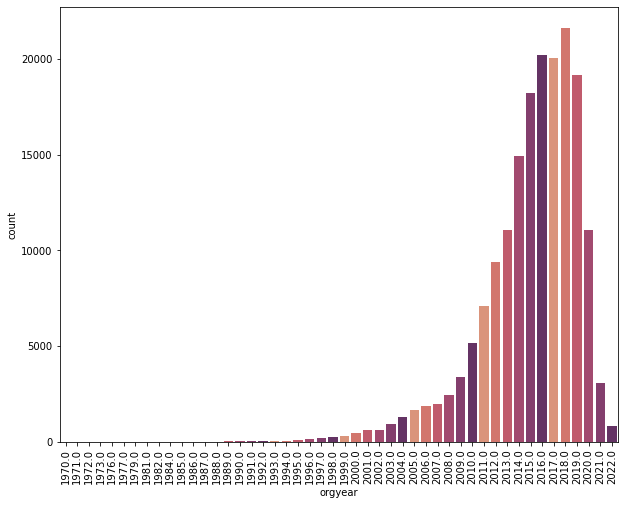

In [ ]:
# OrgYear

fig = plt.figure(figsize = (10,8))

sns.countplot(data = df, x = 'orgyear',palette =  sns.color_palette('flare'))
plt.xticks(rotation = 90)
plt.show()

**Insight:**

- Most number of learners who joined Scaler started their career in 2018, followed by 2016.

**Recommendation:**

- For any new comers/attendees to Masterclass, if they started their career after 2015, Scaler should focus more on them, as there is a decent chance of conversion in this case.

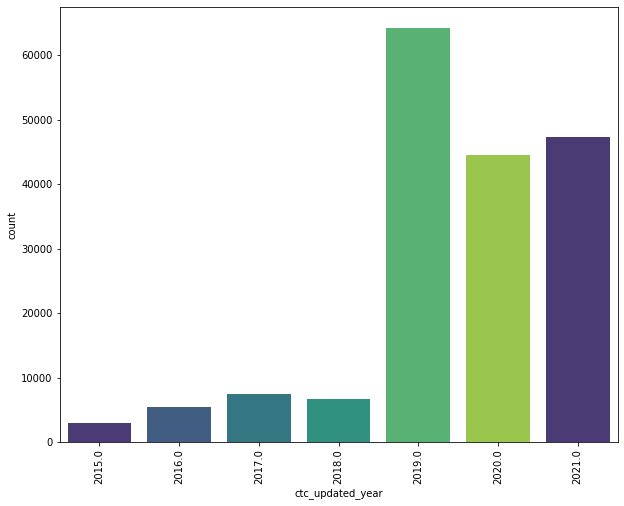

In [ ]:
# CTC Updated Year

fig = plt.figure(figsize = (10,8))

sns.countplot(data = df, x = 'ctc_updated_year',palette =  sns.color_palette('viridis'))
plt.xticks(rotation = 90)
plt.show()

- Most of the CTC's are updated in 2019, and there could also be a chance that most of them can be from 2018 batch(which can be seen in previous graph), which also proves, Scaler provides good placement opportunties in 1 year from the joining

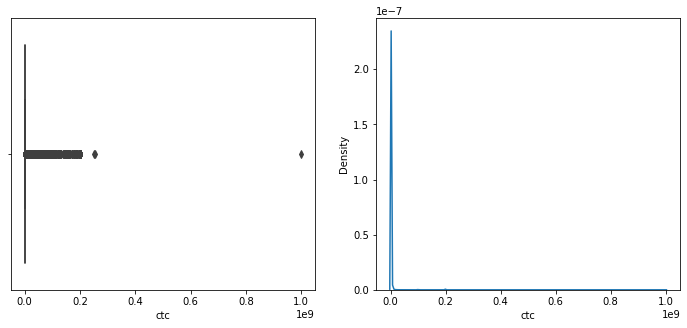

In [ ]:
# CTC 

fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'ctc')

plt.subplot(1,2,2)
sns.kdeplot(data=df,x='ctc')

plt.show()

- From above, we can say there are significant number of outliers are present in CTC column, which we will analyze using IQR method

Number of records where CTC is less than lower bound: (0, 10)
Number of records where CTC is more than upper bound: (12127, 10)
Number of records where CTC is in the range of lower and upper bound: (178524, 10)


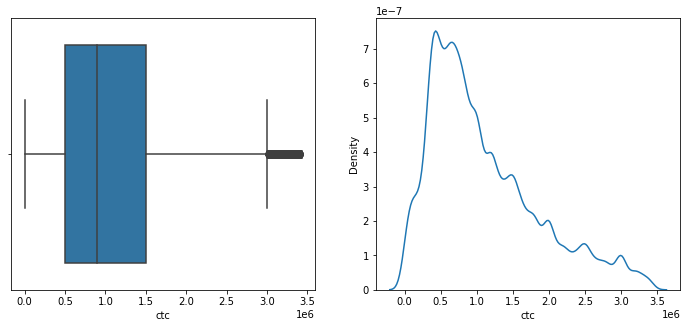

In [ ]:
# Calculate quantiles
q1 = np.percentile(df['ctc'],25)
q3 = np.percentile(df['ctc'],75)

# Calculate IQR Range
IQR = q3 - q1

#boundaries for distribution
upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR

# Filter the data which are not present in this range 
df_lower = df[df['ctc'] < lower_bound]
print(f'Number of records where CTC is less than lower bound: {df_lower.shape}')

df_upper = df[df['ctc'] > upper_bound]
print(f'Number of records where CTC is more than upper bound: {df_upper.shape}')

df_filtered = df[(df['ctc'] >= lower_bound) & (df['ctc'] <= upper_bound)]
print(f'Number of records where CTC is in the range of lower and upper bound: {df.shape}')

# Boxplot to show the updated data

fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(data = df_filtered, x = 'ctc')

plt.subplot(1,2,2)
sns.kdeplot(data=df_filtered,x='ctc')

plt.show()

In [ ]:
df_lower.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE


In [ ]:
df_upper.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE
25,nxbto xzntqztn,d2668cb959e5657c3881413257b9850caa1359c7ce959a...,2015.0,9500000,Backend Engineer,2019.0,2.021750e+06,3.198905e+06,1.879331e+06,7.0
38,evzzxt bvt,69ef6838be8ee5b628375b4cc160ba54c1f7cab8c3b130...,2006.0,11800000,QA Engineer,2019.0,6.729564e+06,2.783229e+06,1.758245e+06,16.0
93,xb v onhatzn,2b0daf6243847309e75a47fb22e9e3dc3f79031edf464a...,2021.0,5000000,Android Engineer,2020.0,3.733632e+06,2.613417e+06,1.622794e+06,1.0
106,oxburjyq ogrhnxgzo rru,996aef9bba62bd99d6cb8e8c112c0ec8096b203ae50b97...,2017.0,200000000,Support Engineer,2020.0,2.798457e+07,2.798457e+07,2.938334e+06,5.0
118,bgzgnjut,a37740bc0cedb23fd029276cbb7f4e821cca7df8dd0f70...,2011.0,6300000,Backend Engineer,2019.0,2.271141e+06,2.659645e+06,1.879331e+06,11.0


- From above we can see that, outliers are still present in the filtered data, but we have a lot better data compared to old one. 

In [ ]:
df_filtered.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1.971557e+06,2.092414e+06,3.469013e+06,6.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,2.197334e+06,2.000211e+06,1.734762e+06,4.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,2.223091e+06,2.188163e+06,1.879331e+06,7.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,1.717560e+06,2.053950e+06,1.879331e+06,5.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,1.996042e+06,2.134969e+06,1.734762e+06,5.0


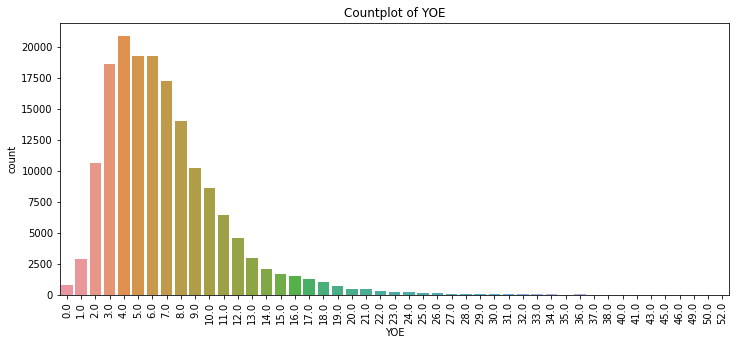

In [ ]:
# YOE

figure = plt.figure(figsize = (12,5))

sns.countplot(data = df_filtered, x = 'YOE')
plt.xticks(rotation = 90)
plt.title('Countplot of YOE')
plt.show()

- YOE follows a heavy left-skewed distribution, with most people having [4.0,6.0] years experience. 
- Very less people have experience with more than 25 years

**Recommendation:**

- As number of people with experience in range of 3 to 7 yrs, Scaler should focus more on these people as there is a good chance of conversion

## Bivariate Analysis

In [ ]:
grouped_data = df.groupby(['company_hash','YOE']).mean().ctc.reset_index()

Now, let's create Designation flag, where CTC is more than average CTC with same YOE and at same company. 

1. Tier-1 if CTC > avg with same YOE and at same company
2. Tier-2 is CTC = avg
3. Tier-3 if CTC < avg

In [ ]:
df['designationFlag'] = 1

for row in tqdm_notebook(range(df.shape[0])):
    _companyHash = df['company_hash'].iloc[row]
    _jobPosition = df['new_job_position'].iloc[row]
    _yearsofexperience = df['YOE'].iloc[row]
    _ctc = df['ctc'].iloc[row]
    _gdata = grouped_data[(grouped_data['company_hash'] == _companyHash) & (grouped_data['YOE'] == _yearsofexperience)]
    
    if _ctc > _gdata['ctc'].iloc[0]:
        df['designationFlag'].iloc[row] = 3
    
    elif _ctc == _gdata['ctc'].iloc[0]:
        df['designationFlag'].iloc[row] = 2
        

  0%|          | 0/178524 [00:00<?, ?it/s]

In [ ]:
df.designationFlag.value_counts()

1    83391
2    53655
3    41478
Name: designationFlag, dtype: int64

1    83391
2    53655
3    41478
Name: designationFlag, dtype: int64

After Designation flag, let's create Class Flag, based on company and job position. Any individual earning more than the average ctc must be having high level of experience or their class is 1 (they are elite learners), anyone earning equal to mean is of class 2 and rest is class 3.

1. Tier-1 if CTC > avg at same company and job_position
2. Tier-2 is CTC = avg
3. Tier-3 if CTC < avg

In [ ]:
grouped_data_1 = df.groupby(['company_hash','new_job_position']).mean().ctc.reset_index()

In [ ]:
df['classFlag'] = 1

for row in tqdm_notebook(range(df.shape[0])):
    _companyHash = df['company_hash'].iloc[row]
    _jobPosition = df['new_job_position'].iloc[row]
    _yearsofexperience = df['YOE'].iloc[row]
    _ctc = df['ctc'].iloc[row]
    _gdata = grouped_data_1[(grouped_data_1['company_hash'] == _companyHash) & (grouped_data_1['new_job_position'] == _jobPosition)]
    
    if _ctc > _gdata['ctc'].iloc[0]:
        df['classFlag'].iloc[row] = 3
    
    elif _ctc == _gdata['ctc'].iloc[0]:
        df['classFlag'].iloc[row] = 2

  0%|          | 0/178524 [00:00<?, ?it/s]

In [ ]:
df.classFlag.value_counts()

1    76076
2    66566
3    35882
Name: classFlag, dtype: int64

In [ ]:
groupbyData = df.groupby(['company_hash']).mean().ctc.reset_index()
groupbyData.head()

,company_hash,ctc
0,0,100000.0
1,0000,300000.0
2,01 ojztqsj,550000.0
3,05mz exzytvrny uqxcvnt rxbxnta,1100000.0
4,1,175000.0


In [ ]:
df['tierFlag'] = 1

for row in tqdm_notebook(range(df.shape[0])):
    _companyHash = df['company_hash'].iloc[row]
    _ctc = df['ctc'].iloc[row]
    _gdata = groupbyData[(groupbyData['company_hash'] == _companyHash)]
    
    if _ctc > _gdata['ctc'].iloc[0]:
        df['tierFlag'].iloc[row] = 3
    
    elif _ctc == _gdata['ctc'].iloc[0]:
        df['tierFlag'].iloc[row] = 2

  0%|          | 0/178524 [00:00<?, ?it/s]

In [ ]:
df.tierFlag.value_counts()

1    109346
3     39827
2     29351
Name: tierFlag, dtype: int64

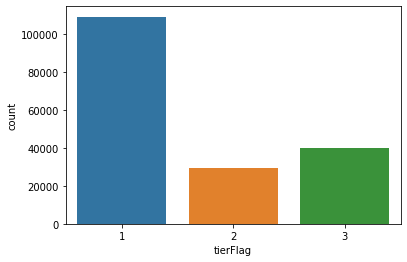

In [ ]:
sns.countplot(df['tierFlag'])
plt.show()

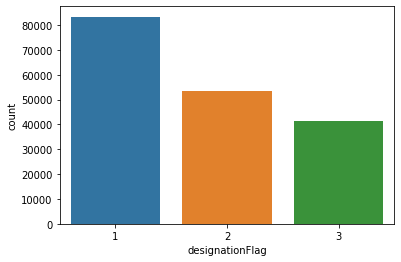

In [ ]:
sns.countplot(df['designationFlag'])
plt.show()

- We can say that people who are freshman are more our learners and this holds true because people in early stage of job wants to excel more by learning new techniques so that good hike can be given.

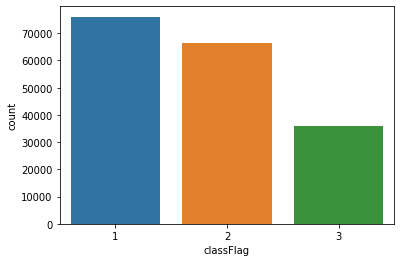

In [ ]:
sns.countplot(df['classFlag'])
plt.show()

## Manual Clustering

- One way of clustering users is based on Designation, YOE and company
- People who are earning more than average in their company or who are working in good companies like tier 1 companies or are working in tech stack are the people whom we should approach and any new learner who lie in these cluster can be advertised as he can purchase our courses.

In [ ]:
df_final = df[(df['ctc'] >= lower_bound) & (df['ctc'] <= upper_bound)]

<AxesSubplot:xlabel='YOE', ylabel='ctc'>

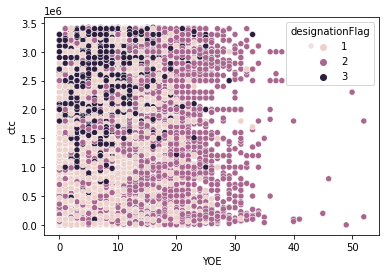

In [ ]:
# Scatterplot based on Designation Flag

sns.scatterplot(x = df_final['YOE'],y = df_final['ctc'],hue = df_final['designationFlag'])

<AxesSubplot:xlabel='YOE', ylabel='ctc'>

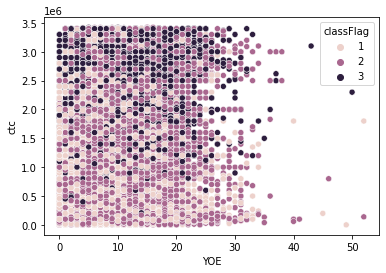

In [ ]:
# Scatterplot based on class Flag

sns.scatterplot(x = df_final['YOE'],y = df_final['ctc'],hue = df_final['classFlag'])

<AxesSubplot:xlabel='YOE', ylabel='ctc'>

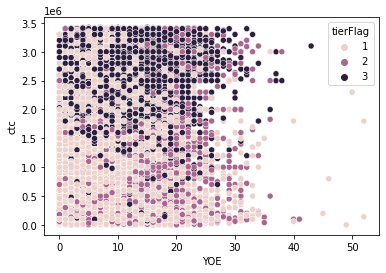

In [ ]:
# Scatterplot based on Tier Flag

sns.scatterplot(x = df_final['YOE'],y = df_final['ctc'],hue = df_final['tierFlag'])

- On clustering based on years_of_experience and ctc along with tierFlag, classFlag, designationFlag we clearly see no pattern to differentiate learners based on these attributes


### Questionnaire

**Q1: Top 10 employees (earning more than most of the employees in the company) - Tier 1**

In [ ]:
df[df['tierFlag'] == 1].sort_values(by='ctc',ascending=False)[:10]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE,designationFlag,classFlag,tierFlag
14986,ntvwy egq xzaxv,b345a668002d32c4b92315d1b5d1f65b320ab2cd539a4f...,2011.0,23980000,Other,2021.0,8.696670e+06,5.082876e+06,2.368863e+06,11.0,2,2,1
21662,qgjvr tzextra,4be076c05194de3f3411e060c1aef15556200f5db88d09...,2018.0,18600000,Other,2020.0,5.453477e+06,4.382892e+06,4.297006e+06,4.0,2,2,1
99556,mvmjrgz ytvrny,c5e7360dd9c5dd31b9b4927ccccc2f3be8f6f6a5a84963...,2015.0,17000000,Backend Engineer,2020.0,8.065930e+06,4.174718e+06,2.965263e+06,7.0,2,2,1
81489,bvwjo,f0e8b63ea3096eb17da05268753c0ad704ea020ad93fdf...,2005.0,14000000,QA Engineer,2019.0,5.627410e+06,3.784393e+06,1.622794e+06,17.0,2,2,1
108209,aggqavoy,68f1fea4dbfb7ae2209664b93d5f57fb86912dbe516b37...,2018.0,13500000,Backend Engineer,2020.0,3.886830e+06,3.719339e+06,1.733222e+06,4.0,2,2,1
200815,uqgoutq bvqptnurvwt,5574b4162ee933b4be7eb43f6b55a3f8f8aaaee4223c0a...,2006.0,13000000,NaN,2016.0,6.635494e+06,3.654285e+06,3.469013e+06,16.0,2,1,1
7051,ho mvzp,7ffb1e475e90f5bcb65de6664f24820a0049992f50cddd...,2017.0,12000000,Engineering Leadership,2020.0,9.880037e+06,3.524176e+06,1.879331e+06,5.0,2,1,1
38,evzzxt bvt,69ef6838be8ee5b628375b4cc160ba54c1f7cab8c3b130...,2006.0,11800000,QA Engineer,2019.0,6.729564e+06,2.783229e+06,1.758245e+06,16.0,3,2,1
21329,bvwjo,732ff8ff5b8a2108ce6884fed7779e2d592317d8d61b6c...,2008.0,11500000,Support Engineer,2020.0,5.627410e+06,3.459122e+06,1.733222e+06,14.0,2,2,1
174366,vsxrjojo,4f898f1311971431272ed57df9a16bd5daa44d0b1e4516...,2015.0,11000000,Frontend Engineer,2020.0,5.173709e+06,3.394068e+06,3.469013e+06,7.0,3,2,1


**Q2: Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1**

In [ ]:
df[(df['tierFlag'] == 1) & (df['classFlag'] == 1)].sort_values(by='ctc',ascending=False)[:10]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE,designationFlag,classFlag,tierFlag
200815,uqgoutq bvqptnurvwt,5574b4162ee933b4be7eb43f6b55a3f8f8aaaee4223c0a...,2006.0,13000000,NaN,2016.0,6.635494e+06,3.654285e+06,3.469013e+06,16.0,2,1,1
7051,ho mvzp,7ffb1e475e90f5bcb65de6664f24820a0049992f50cddd...,2017.0,12000000,Engineering Leadership,2020.0,9.880037e+06,3.524176e+06,1.879331e+06,5.0,2,1,1
142852,x vb v eqtoytq,2226e377e79ff88953de0d78d04b58b0e0cb21c2eab694...,2018.0,10600000,Backend Engineer,2018.0,1.549816e+07,3.342024e+06,1.879331e+06,4.0,3,1,1
81520,zxbmrt ongqvst,b6c269b356f1f7fd8d0aa23957f42d832a1de3d6c58ed3...,2006.0,7100000,Engineering Leadership,2021.0,3.105226e+06,2.886645e+06,1.879331e+06,16.0,2,1,1
107038,wvqttb,0485990d28fdbb10e494793b31dd97f94c326a93c07a2d...,2014.0,7000000,Data Scientist,2020.0,6.720950e+06,2.873634e+06,1.733222e+06,8.0,3,1,1
147673,wvqttb,1e4f3b7db3da519b91c8c613294aeb3e775b9c58f19df0...,2013.0,7000000,Other,2020.0,6.720950e+06,2.929335e+06,1.733222e+06,9.0,2,1,1
162619,xzagqot unt rna,3f0f3d507158974626454f18f97876cd1f3ffe816a9757...,2008.0,6500000,Backend Engineer,2020.0,3.248500e+06,3.248500e+06,3.469013e+06,14.0,1,1,1
110436,sggsrt,21ccf8c276e5c253c56dae9ff4ddb81346a609851f738b...,2010.0,5800000,NaN,2017.0,5.628625e+06,2.717504e+06,1.733222e+06,12.0,3,1,1
115040,sggsrt,e134a33fd1375efa891d930656426c647180e16bd07fec...,2014.0,5800000,NaN,2019.0,5.628625e+06,2.717504e+06,1.734762e+06,8.0,3,1,1
81875,sggsrt,d52ef2edb60f6addc8a8f3fee173b62732d60c57ff9fe0...,2017.0,5700000,FullStack Engineer,2021.0,5.628625e+06,2.503782e+06,3.469013e+06,5.0,3,1,1


**Q3: Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3**

In [ ]:
df[(df['tierFlag'] == 1) & (df['classFlag'] == 3)].sort_values(by='ctc',ascending=True)[:10]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE,designationFlag,classFlag,tierFlag
45804,rs trtwnqgzxwo,ffb842b12b1b74ffdbfba6e5f4eaf7d41cff2eae1177b9...,2009.0,14000,Android Engineer,2016.0,3.109784e+06,1.964696e+06,3.692015e+06,13.0,2,3,1
99964,tlvav,9f5a57a3223c3325f021e14846ae0717dd803121364908...,2019.0,50000,Android Engineer,2021.0,2.770915e+06,1.969380e+06,1.879331e+06,3.0,3,3,1
137493,qhmxpvr,3e69a22ac300af4d4c930d931a83c3563da47f883f8d92...,2011.0,50000,Backend Engineer,2019.0,1.856133e+06,1.969380e+06,1.879331e+06,11.0,2,3,1
169951,jvzatd,d506868562c3692b7d27f7ed1dbf12bc2f18011618ce64...,2014.0,57000,Backend Engineer,2021.0,1.487988e+06,1.970291e+06,1.954632e+06,8.0,1,3,1
94045,vrxsz ntwyzgrgsj,30ccf1e009eb8d46ffd730949a0d5fb496b184c1d7f3af...,2017.0,60000,Backend Engineer,2019.0,1.887914e+06,1.970681e+06,1.879331e+06,5.0,2,3,1
134984,bxqvznxo,7fd469c7806091b9b66f557f15384d6a7936afb0bdd8fb...,2006.0,62000,Backend Engineer,2017.0,2.155589e+06,1.970941e+06,3.469013e+06,16.0,3,3,1
158787,sqxa ajzvbxwo,255af3d7420b424b16498684860699515349c95b82af01...,2012.0,65000,Frontend Engineer,2018.0,6.083927e+06,1.971331e+06,1.734762e+06,10.0,2,3,1
175964,ygbt atugn,459e55c5547fd9e0e44ef27dbe7f8ec1aefe85922bb1ed...,2018.0,80000,NaN,2018.0,1.899861e+06,1.973283e+06,1.734762e+06,4.0,1,3,1
178769,jvzatd,3f67d0f6c0843667b0d2aa84e23c313d31f766cf98a1d3...,2020.0,80000,Backend Engineer,2020.0,1.487988e+06,1.973283e+06,1.879331e+06,2.0,2,3,1
73924,vaxavo,7b2173a86755c4f6d78921ad233f64b1d41582089271ba...,2009.0,87000,Engineering Leadership,2019.0,1.894549e+06,1.948719e+06,1.879331e+06,13.0,2,3,1


**Q4: Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [ ]:
df[df['tierFlag'] == 3].sort_values(by='ctc',ascending=True)[:10]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE,designationFlag,classFlag,tierFlag
183804,xm,75357254a31f133e2d3870057922feddeba82b88056a07...,2019.0,16,NaN,2018.0,1.936380e+06,1.962876e+06,2.955225e+06,3.0,2,2,3
147937,uqtu ntwyzgrgsxto,d9f0beb941744f9df7dd7ca4ae6486ae1c69d57a2de99a...,2016.0,2400,FullStack Engineer,2019.0,1.908223e+06,1.936718e+06,1.758245e+06,6.0,2,2,3
133634,gutzoggi,7e6601095e73a9867259f9806cce29ec2527417ca9e076...,2012.0,9500,iOS Engineer,2016.0,1.937293e+06,1.964110e+06,3.292003e+06,10.0,2,2,3
153496,exznqhon ogrhnxgzo ucn rna,ab2dc9db23c3104f0b6b3dbd4cdd5bfb9e5829b8b7943d...,2017.0,10000,Data Scientist,2020.0,1.909315e+06,1.909315e+06,1.734762e+06,5.0,3,2,3
125315,exznqhon ogrhnxgzo ucn rna,ab2dc9db23c3104f0b6b3dbd4cdd5bfb9e5829b8b7943d...,2017.0,10000,Data Analyst,2020.0,1.909315e+06,1.909315e+06,1.733222e+06,5.0,3,2,3
158071,mrxzp22,d196c0c5bdb353343d06c7954262385c2dfd1a6421aafa...,2018.0,12000,Backend Engineer,2017.0,1.937867e+06,1.964436e+06,1.879331e+06,4.0,3,2,3
62076,mlxn,63220cc7ba979aac174db517064fb6dc7002461e5e0296...,2015.0,15000,Backend Engineer,2017.0,1.909871e+06,1.964826e+06,1.734762e+06,7.0,2,2,3
61762,agwngq ftm rna,91e54946b34d8ad4f1a50f6fcb7c9104bac043d3ba8169...,2010.0,15000,Frontend Engineer,2017.0,1.938151e+06,1.964826e+06,2.955225e+06,12.0,2,2,3
70896,xz rgwg,66573ebeb4fcfc496d2af1548a18a62ec3a48dae59d1cc...,2016.0,16000,Backend Engineer,2016.0,1.938576e+06,1.964956e+06,1.565776e+06,6.0,3,2,3
90988,xmtd,68071ee5df5210fe9264fbad4609a751ad30dbe6fc05fc...,2016.0,20000,FullStack Engineer,2021.0,1.880733e+06,1.939215e+06,2.812059e+06,6.0,1,2,3


**Q5: Top 10 companies based on CTC**

In [ ]:
df.groupby('company_hash').mean()[['ctc']].sort_values('ctc', ascending = False).head(10)

,ctc
company_hash,
whmxw rgsxwo uqxcvnt rxbxnta,1.000150e+09
aveegaxr xzntqzvnxgzvr hzxctqoxnj,2.500000e+08
wrxwpgzwvqt qtnvxr ucn rna,2.000000e+08
nvrtzn ouvwt xzw,2.000000e+08
vooxontvoj cxqnhvr onveexzs uqxcvnt ogrhnxgzo,2.000000e+08
evwxrt otqcxwto,2.000000e+08
exatrxo wgqugqvnt ogrhnxgzo,2.000000e+08
i wgzztin mhoxztoo ogrhnxgzo ucn rna,2.000000e+08
boo,2.000000e+08


- We can say that above are top 10 companies having mean CTC greater than others

**Q6: Top 2 positions in every company (based on their CTC)**

In [ ]:
pd.DataFrame(df.groupby(['company_hash', 'job_position'])['ctc'].apply(lambda x: x.nlargest(2).sum()))

ctc
company_hash                   job_position               
0                              Other                100000
0000                           Other                300000
01 ojztqsj                     Android Engineer     270000
                               Frontend Engineer    830000
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer    1100000
...                                                    ...
zyuw rxbxnta                   Frontend Engineer   2400000
zyvzwt wgzohrnxzs tzsxzttqo    Frontend Engineer    940000
zz                             Other               1370000
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer   600000
zzzbzb                         Other                720000

[59642 rows x 1 columns]

- Using above result, we can see that mostly see that tech positions are the good paying jobs in each company so we should offer same to each learner to maximise profits.

## K-Means Clustering

In [ ]:
df_final.head(2)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE,designationFlag,classFlag,tierFlag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,1.971557e+06,2.092414e+06,3.469013e+06,6.0,2,2,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,2.197334e+06,2.000211e+06,1.734762e+06,4.0,1,1,1


In [ ]:
X = df_final[['orgyear', 'ctc',  'ctc_updated_year', 'num_company_hash', 'num_email_hash',
          'new_job_position', 'YOE', 'designationFlag', 'classFlag', 'tierFlag']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X)

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, init = "random", n_init = 2)
y_pred = kmeans.fit_predict(X_train)

clusters = pd.DataFrame(X_train, columns = X.columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,orgyear,ctc,ctc_updated_year,num_company_hash,num_email_hash,new_job_position,YOE,designationFlag,classFlag,tierFlag,label
0,0.192345,-0.001193,0.366070,-0.173002,-0.055028,1.619855,-0.192345,0.372250,0.383438,-0.674927,1
1,0.692066,-0.858495,-0.380028,0.057498,-0.595104,-0.610909,-0.692066,-0.902814,-0.972225,-0.674927,1
2,-0.057515,1.185840,0.366070,0.083794,0.505820,-0.424950,0.057515,0.372250,0.383438,0.604736,0


In [ ]:
clusters['label'].value_counts()

1    86994
2    41395
0    38008
Name: label, dtype: int64

- From above data we can see that mostly learners are categorized into cluster 1 (while least are into 0 and 2).

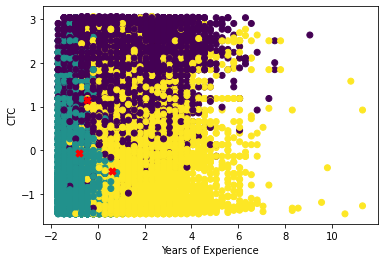

In [ ]:
plt.scatter(clusters['YOE'], clusters['ctc'], c = clusters['label'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  color = "red",
            marker = "X", s = 50)
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()

In [ ]:
df_final.YOE.max()

52.0

### Recommendation

From above figure we can clearly see that there are 3 clusters which are self explanatory as learners with high years of experience and high CTC are one cluster (people with high pay and good experience probably mangerial position people) whereas people who are having more CTC and less experience (maybe directors, CEOs, freshers in elite companies) are another cluster and people with less CTC and less expereience (freshers from 2nd or 3rd year) are third cluster.

Hence, we can come up with marketing strategies for learning belonging to respective cluster to ramp up our sales

Also, we don't know how many clusters to keep so we will use Elbow method for this.

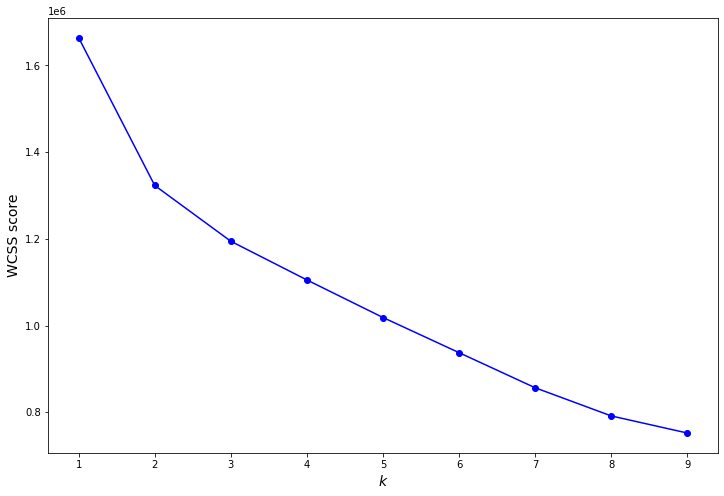

In [ ]:
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X_train) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("WCSS score", fontsize=14)
plt.show()

### Recommendation

From above elbow plot we can see that 3 are the optimum number of clusters and which proves are hypothesis that we are having three cluster learners

- High pay, high years of experience (managerial level people with good experience, who are looking for upskillment or to go at even higher scale)
- High pay, less experience (people placed at good MAANG or FAANG companies, who might be looking for upskillment or are lacking industry skills)
- Less pay, less experience (our target audience, as they want hike and knowledge so they want scaler courses)

## Hierarchical Clustering

Since, K means clustering is the best option to get inference and can also be used in production for a new learning coming in.

Since, our data is too large hence we will try to use sample of data.

In [ ]:
sampleData = X.sample(frac = 0.15, 
                      replace = True, 
                      random_state = 1)
scaler = StandardScaler()
sampleDataScaled = scaler.fit_transform(sampleData)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchialClustering = AgglomerativeClustering(n_clusters = 3, 
                                                affinity = 'euclidean', 
                                                linkage = 'ward')

y_pred = hierarchialClustering.fit_predict(sampleDataScaled)

clusters = pd.DataFrame(sampleDataScaled, columns = X.columns)
clusters['hier_labels'] = y_pred

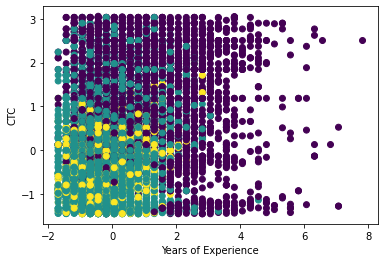

In [ ]:
plt.scatter(clusters['YOE'], clusters['ctc'], c = clusters['hier_labels'])
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()

#### Recommendation

- From hierarchial clustering we can see that there are still 3 clusters and thus it proves that K means was also doing same thing with data



## DBSCAN

In [ ]:
sampleData = X.sample(frac = 0.15, 
                      replace = True, 
                      random_state = 1)
scaler = StandardScaler()
sampleDataScaled = scaler.fit_transform(sampleData)

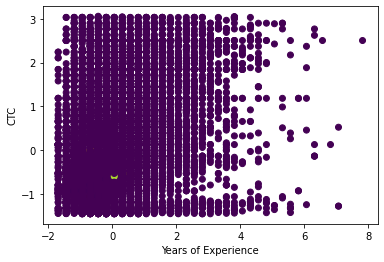

In [ ]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 0.3, min_samples = 4).fit(sampleData)
dbscan_labels = dbsc.labels_

clusters = pd.DataFrame(sampleDataScaled, columns = X.columns)
clusters['dbscan_labels'] = dbscan_labels

plt.scatter(clusters['YOE'], clusters['ctc'], c = clusters['dbscan_labels'])
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()


Here, DBSCAN performed worst and thus we can still rely on K means and agglomerative result for categorising learners.

### Recommendation

Using results of K means we can say that there are broadly 3 categories of learners

High years of experience and high pay (mostly managerial level)
High pay and less experience (placed in good companies like google , facebook)
Less pay and less experience (our target as they want upskillment and good hike)